In [1]:
import pandas as pd
data = pd.read_csv('/content/Coh-Metrix_5_Class.xlsx - coh metrix 5 class.csv')
print(data.shape)
print(data.columns)

(150, 108)
Index(['Problem ', 'Level ', 'DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd',
       'DESSL', 'DESSLd', 'DESWLsy',
       ...
       'WRDCNCc', 'WRDIMGc', 'WRDMEAc', 'WRDPOLc', 'WRDHYPn', 'WRDHYPv',
       'WRDHYPnv', 'RDFRE', 'RDFKGL', 'RDL2'],
      dtype='object', length=108)


In [2]:
data.head()

,Problem,Level,DESPC,DESSC,DESWC,DESPL,DESPLd,DESSL,DESSLd,DESWLsy,...,WRDCNCc,WRDIMGc,WRDMEAc,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2
0,There are constants alpha and beta suc...,Level 5,1,2,23,2.000,0.000,13.000,12.728,1.304,...,225.000,279.333,325.000,2.360,7.458,0.846,2.454,84.844,4.282,11.138
1,The length of the segment between the points ...,Level 5,1,2,28,2.000,0.000,14.500,6.364,1.250,...,347.778,342.800,321.500,3.344,4.742,0.846,1.387,86.875,4.620,24.309
2,Chewbacca has 20 pieces of cherry gum and 30 p...,Level 5,1,5,80,5.000,0.000,16.000,16.233,1.325,...,390.667,405.667,394.667,4.826,6.126,1.210,1.993,78.500,6.285,25.517
3,"For some constants a and b, let [f(x) = ...",Level 5,6,8,51,1.333,0.816,5.875,4.390,1.137,...,376.833,372.846,381.333,3.000,6.680,1.170,1.964,100.000,0.313,10.050
4,Find the greatest a such that frac{7 sqr...,Level 5,1,1,20,1.000,0.000,22.000,0.000,1.050,...,331.000,380.000,435.500,2.000,0.000,0.875,0.083,97.705,4.600,21.139


In [ ]:
data.drop(columns = ['Problem '], inplace = True)

In [ ]:
X = data.drop(columns = ['Level '])
y = data['Level ']

In [ ]:
len(X)

150

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluation(y_train_pred, y_test_pred, y_train, y_test):
  print("train_evaluation:\n")
  print(classification_report(y_train_pred, y_train))
  print(confusion_matrix(y_train_pred, y_train))
  print("\ntest_evaluation:\n")
  print(classification_report(y_test_pred, y_test))
  print(confusion_matrix(y_test_pred, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc=RandomForestClassifier(n_estimators=25)

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3],              # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split
    'criterion': ['gini', 'entropy', 'log_loss'],
    'oob_score': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=25),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'oob_score': [True, False]})

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'oob_score': False}
Best Score:  0.38333333333333336


In [ ]:
# Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'oob_score': False}
# Best Score:  0.38333333333333336

In [ ]:
y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
evaluation(y_train_pred, y_test_pred, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.96      0.88      0.92        26
     Level 2       0.92      0.92      0.92        24
     Level 3       0.88      0.95      0.91        22
     Level 4       0.92      0.96      0.94        23
     Level 5       1.00      0.96      0.98        25

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120

[[23  1  0  2  0]
 [ 1 22  1  0  0]
 [ 0  1 21  0  0]
 [ 0  0  1 22  0]
 [ 0  0  1  0 24]]

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.33      0.67      0.44         3
     Level 2       0.50      0.50      0.50         6
     Level 3       0.00      0.00      0.00         2
     Level 4       0.17      0.10      0.12        10
     Level 5       0.50      0.33      0.40         9

    accuracy                           0.30        30
  

##Spectral-clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

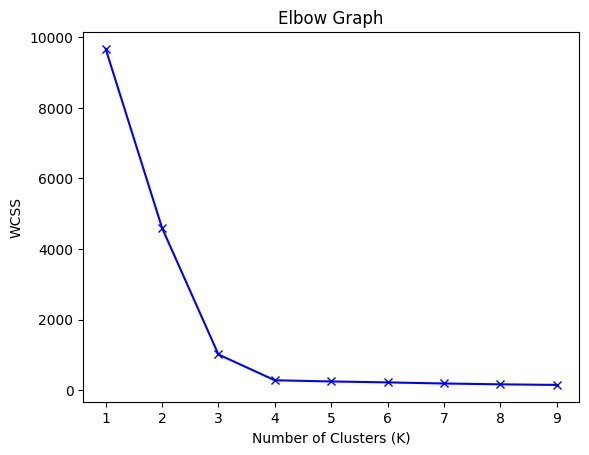

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=150, centers=4, random_state=42)

# Perform K-means clustering for different values of K
k_values = range(1, 10)  # Number of clusters
wcss = []  # Within-cluster sum of squares

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

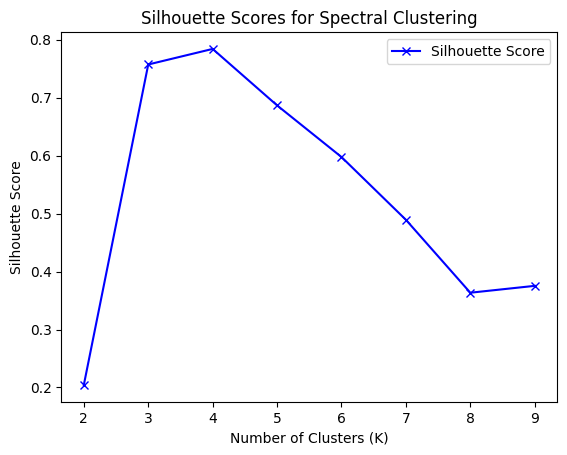

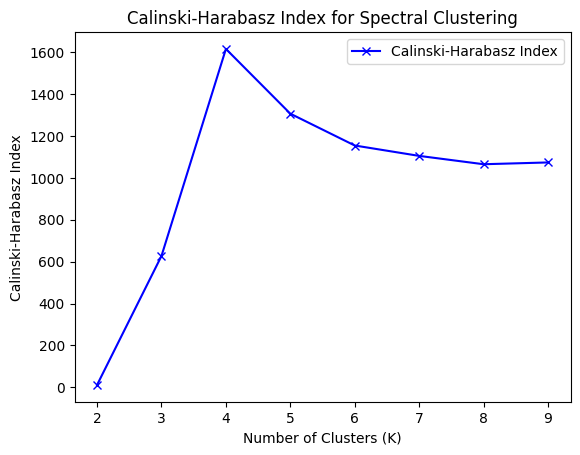

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Generate sample data
X, _ = make_blobs(n_samples=150, centers=4, random_state=42)

# Perform spectral clustering for different values of K
k_values = range(2, 10)  # Number of clusters
silhouette_scores = []  # Silhouette scores
calinski_scores = []  # Calinski-Harabasz index scores

for k in k_values:
    spectral_clustering = SpectralClustering(n_clusters=k)
    labels = spectral_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Spectral Clustering')
plt.legend()
plt.show()

# Plot the Calinski-Harabasz index scores
plt.plot(k_values, calinski_scores, 'bx-', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Spectral Clustering')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import SpectralClustering

# Create a SpectralClustering object
spectral_clustering = SpectralClustering(
    n_clusters=4,          # Number of clusters to identify
    affinity='nearest_neighbors',   # Affinity matrix computation method (can be 'nearest_neighbors', 'rbf', etc.)
    n_neighbors=10,        # Number of neighbors for the nearest_neighbors affinity option
    assign_labels='kmeans' # Method for assigning labels ('kmeans' or 'discretize')
)

# Fit and predict the clusters
clusters = spectral_clustering.fit_predict(X)

# Access the cluster assignments
print(clusters)

[0 0 3 1 2 2 0 0 2 2 3 3 1 3 2 1 3 1 1 1 0 3 2 3 2 3 3 0 3 1 1 0 2 3 1 1 2
 3 2 0 1 3 0 0 2 1 0 2 0 3 1 1 1 0 0 3 1 2 3 0 3 3 2 2 2 1 2 2 1 1 3 0 1 0
 0 1 1 2 1 0 0 3 0 2 1 0 1 2 3 1 3 1 0 3 2 1 3 3 0 1 2 2 0 0 2 0 3 1 1 3 2
 1 1 3 3 1 3 2 3 0 3 3 1 3 0 2 3 2 1 3 0 0 1 2 0 2 2 2 1 3 0 0 2 2 0 0 2 0
 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y1 = pd.Series(clusters)

In [ ]:
pd.crosstab(y, y1)

col_0,0,1,2,3
Level,,,,
Level 1,10,13,4,3
Level 2,11,7,9,3
Level 3,11,12,3,4
Level 4,12,13,4,1
Level 5,12,16,2,0


In [ ]:

# col_0	   0	 1	2	 3
# Level				
# Level 1	 10	 13	4	3
# Level 2	 11	 7  9	3
# Level 3	 11	 12	3	4
# Level 4	 12	 13	4	1
# Level 5	 12	 16	2	0

In [ ]:
pd.crosstab(y, y1)

col_0,0,1,2
Level,,,
Level 1,21,3,6
Level 2,18,3,9
Level 3,23,4,3
Level 4,25,1,4
Level 5,28,0,2


In [ ]:

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

In [ ]:
data['classes_4'] = y1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y1)

In [ ]:
rfc=RandomForestClassifier(n_estimators=25)

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3],              # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split
    'criterion': ['gini', 'entropy', 'log_loss'],
    'oob_score': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=25),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'oob_score': [True, False]})

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'oob_score': True}
Best Score:  0.2833333333333333


In [ ]:
# Best Parameters:  {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'oob_score': True}
# Best Score:  0.2833333333333333

In [ ]:
y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
evaluation(y_train_pred, y_test_pred, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.93      0.76      0.84        34
     Level 2       0.68      0.94      0.79        18
     Level 3       0.83      0.79      0.81        24
     Level 4       0.70      0.78      0.74        18
     Level 5       0.79      0.73      0.76        26

    accuracy                           0.79       120
   macro avg       0.79      0.80      0.79       120
weighted avg       0.81      0.79      0.79       120

[[26  1  2  2  3]
 [ 0 17  1  0  0]
 [ 0  2 19  1  2]
 [ 1  2  1 14  0]
 [ 1  3  0  3 19]]

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.00      0.00      0.00         9
     Level 2       0.20      0.14      0.17         7
     Level 3       0.14      0.25      0.18         4
     Level 4       0.10      0.50      0.17         2
     Level 5       0.50      0.38      0.43         8

    accuracy                           0.20        30
  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
evaluation(y_train_pred, y_test_pred, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.93      0.76      0.84        34
     Level 2       0.68      0.94      0.79        18
     Level 3       0.83      0.79      0.81        24
     Level 4       0.70      0.78      0.74        18
     Level 5       0.79      0.73      0.76        26

    accuracy                           0.79       120
   macro avg       0.79      0.80      0.79       120
weighted avg       0.81      0.79      0.79       120

[[26  1  2  2  3]
 [ 0 17  1  0  0]
 [ 0  2 19  1  2]
 [ 1  2  1 14  0]
 [ 1  3  0  3 19]]

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.00      0.00      0.00         9
     Level 2       0.20      0.14      0.17         7
     Level 3       0.14      0.25      0.18         4
     Level 4       0.10      0.50      0.17         2
     Level 5       0.50      0.38      0.43         8

    accuracy                           0.20        30
  

## Including Math Features

In [4]:
import re

In [18]:
def get_equations_count(expression):
  regexes = [r"$$([^$]+)$$", r"$([^$]+)$"]  #  , r"\([^$]+)", r"\([^$]+)"
  no_of_equations = 0
  eqs = []
  
  #For each regex, we are finding the number of equations
  for regex in regexes:
    matches = re.findall(regex, expression)
    for eqn in matches:

      #Considering only those equations that have a min length of 3
      if len(eqn) >= 3:
        eqs.append(eqn)
        no_of_equations += 1
    
    # Replacing the equations in the original text
    expression = re.sub(regex, "", expression)
  return eqs, no_of_equations, expression

In [6]:
def eliminate_concatenated_variables(strings):
    strings_set = set(strings)
    is_concatenated = True

    while is_concatenated:
        is_concatenated = False
        for string in strings_set.copy():
            for i in range(1, len(string)):
                prefix = string[:i]
                suffix = string[i:]
                if prefix in strings_set and suffix in strings_set:
                    strings_set.remove(string)
                    is_concatenated = True
                    break

    return strings_set

In [7]:
def get_variable_count(equations):
  # Define regular expression pattern to extract variables
  variable_pattern = r"\?[a-zA-Z]+(?:_[0-9]+)?(?:\^{[0-9]+})?"
  max_no_of_variables = 0

  for equation in equations:
    # Find all variables in the equation
    variables = re.findall(variable_pattern, equation)

    # Count the number of unique variables
    unique_variables = set(variables)
    unique_variables = eliminate_concatenated_variables(unique_variables)
    num_unique_variables = len(unique_variables)
    max_no_of_variables = num_unique_variables if num_unique_variables > max_no_of_variables else max_no_of_variables

  return max_no_of_variables

In [8]:
def detect_exp_or_mod(equations):
  exponentiation_regex = r'\^'
  has_exponentiation = any(re.search(exponentiation_regex, equation) for equation in equations)

  # Detect "mod" (modulo)
  modulo_regex = r'\bmod\b'
  has_modulo = any(re.search(modulo_regex, equation) for equation in equations)

  # Detect "|a+b|"
  absolute_value_regex = r'\|.*?\|'
  has_absolute_value =any(re.search(absolute_value_regex, equation) for equation in equations)
  
  return has_exponentiation or has_modulo or has_absolute_value

In [9]:
def has_log(equations):
  # Detect "log" function
  log_regex = r'\log'
  return any(re.search(log_regex, equation) for equation in equations)
     

In [10]:
def has_fractions(equations):
  fraction_pattern = r"[frac]"
  
  for equation in equations:
  # Extract fractions from the equation
    fractions = re.findall(fraction_pattern, equation)
    if len(fractions) > 0:
      return True
  return False

In [11]:
def has_equality_or_inequality(equations):
  # Detect equality or inequality
  equality_regex = r'(=|>|<|\leq|\geq|\neq)'
  return any(re.search(equality_regex, equation) for equation in equations)

In [12]:
def extract_math_features(problem):
  eqns, equations_count, modified_problem = get_equations_count(problem)
  variable_count = get_variable_count(eqns)
  has_exp_or_mod = detect_exp_or_mod(eqns)
  has_logarithm = has_log(eqns)
  has_fracs = has_fractions(eqns)
  has_eq_or_neq = has_equality_or_inequality(eqns)

  return pd.Series({'modified_problem': modified_problem, 'no_of_equations': equations_count, 'no_of_variables': variable_count, "has_exponential_or_mod" : has_exp_or_mod, "has_logarithm": has_logarithm, 'has_fraction': has_fracs, 'has_equality_or_inequality':has_eq_or_neq})

In [19]:
math_problems = pd.concat([data, data['Problem '].apply(extract_math_features)], axis=1)

In [21]:
data.shape

(150, 108)

In [22]:
math_problems.shape

(150, 115)

In [25]:
X = math_problems.drop(columns = ['Problem ', 'modified_problem', 'Level '])
y = math_problems['Level ']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
rfc=RandomForestClassifier(n_estimators=15)

In [48]:
param_grid = {
    'max_depth': [3, 5, 7],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3],              # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split
    'criterion': ['gini', 'entropy', 'log_loss'],
    'oob_score': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=15),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'oob_score': [True, False]})

In [49]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'oob_score': False}
Best Score:  0.4


In [ ]:
# for n_estimators = 20
# Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'oob_score': False}
# Best Score:  0.3833333333333333

In [ ]:
# for n_estimators = 15


In [50]:
y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
evaluation(y_train_pred, y_test_pred, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.79      0.86      0.83        22
     Level 2       0.92      0.88      0.90        25
     Level 3       0.75      0.86      0.80        21
     Level 4       0.88      0.78      0.82        27
     Level 5       0.92      0.88      0.90        25

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.86      0.85      0.85       120

[[19  0  2  1  0]
 [ 1 22  1  1  0]
 [ 1  1 18  1  0]
 [ 1  1  2 21  2]
 [ 2  0  1  0 22]]

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.33      0.67      0.44         3
     Level 2       0.50      0.75      0.60         4
     Level 3       0.17      0.25      0.20         4
     Level 4       0.17      0.09      0.12        11
     Level 5       0.33      0.25      0.29         8

    accuracy                           0.30        30
  

##Hyper parameter Tuning

In [36]:
rfc=RandomForestClassifier(n_estimators=15, class_weight = 'balanced', criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, oob_score = False)

In [55]:
rfc=RandomForestClassifier(n_estimators=15, class_weight = 'balanced', criterion = 'entropy', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, oob_score = False)

rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
evaluation(y_train_pred, y_test_pred, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.92      0.92      0.92        24
     Level 2       0.96      0.92      0.94        25
     Level 3       0.88      0.95      0.91        22
     Level 4       0.96      0.96      0.96        24
     Level 5       1.00      0.96      0.98        25

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

[[22  0  1  1  0]
 [ 1 23  1  0  0]
 [ 0  1 21  0  0]
 [ 1  0  0 23  0]
 [ 0  0  1  0 24]]

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.50      1.00      0.67         3
     Level 2       0.50      0.75      0.60         4
     Level 3       0.33      0.67      0.44         3
     Level 4       0.33      0.18      0.24        11
     Level 5       0.50      0.33      0.40         9

    accuracy                           0.43        30
  

In [ ]:
  # n_esstimator = 15  & min_samples_leaf = 1
              precision    recall  f1-score   support

     Level 1       0.33      0.50      0.40         4
     Level 2       0.50      0.75      0.60         4
     Level 3       0.50      0.60      0.55         5
     Level 4       0.33      0.22      0.27         9
     Level 5       0.50      0.38      0.43         8

    accuracy                           0.43        30
   macro avg       0.43      0.49      0.45        30
weighted avg       0.43      0.43      0.42        30

[[2 1 0 1 0]
 [1 3 0 0 0]
 [0 1 3 1 0]
 [2 0 2 2 3]
 [1 1 1 2 3]]

In [56]:
math_problems.to_csv('math_problems_Exp_1.csv', index=False)